In [1]:
import requests
from IPython.core.display import HTML

In [2]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# TensorFlow and tf.keras
import tensorflow as tf

%matplotlib inline

In [3]:
TITLE_FONTSIZE  = 14
AXIS_LABEL_SIZE = 12

<a id="contents"></a>

## Notebook Contents

  - [Problem Statement](#intro)
  - [The Kannada MNIST Dataset](#about)
  - [Downloading the Data Files](#data)
  - [Questions](#questions)
  - [Solutions](#solutions)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<a id="intro"></a>
<h2> Problem Statement </h2>

[Return to contents](#contents)
<br /><br />

ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.
<br /><br />
There are several methods used to improve ANN generalization. 
<br /><br />
One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.
<br /><br />
However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella term of "regularization".
<br /><br />
In this problem, you are asked to regularize a network of a given architecture.

<a id="about"></a>
<br /><br />
<h3> The Kannada MNIST Dataset </h3>

[Return to contents](#contents)
<br /><br />

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F1e01bcc28b5ccb7ad38a4ffefb13cde0%2Fwondu.png?generation=1603204077179447&alt=media)

<br /><br />
For this problem, we will be working with a modified version of [Kannada MNIST dataset](https://arxiv.org/pdf/1908.01242.pdf) , which is a large database of handwritten digits in the indigenous language *Kannada*.
<br /><br />
This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. 
<br /><br />
We will simplify the problem by only use the digits labeled `0` and `1` owing to the similarity of the two symbols, and we want to use a total of 1200 samples for training (this includes the data you will use for validation).
<br /><br />
To understand the dataset better, we recommend this [article](https://towardsdatascience.com/a-new-handwritten-digits-dataset-in-ml-town-kannada-mnist-69df0f2d1456) by Vinay Prabhu, the curator of the dataset.
<br /><br />
<a id="data"></a>

<h4> Downloading the Data Files </h4>

[Return to contents](#contents)
<br />
Here's a brief description of the data files:
<br /><br />
- `kmnist_train.csv` is our training dataset and the last column contains our response class. The 784 other columns correspond to the pixel values of the 28x28 dimension image.
<br /><br />
Class 0 means a sample is the handwritten digit `0` and class 1 means a sample is the handwritten digit `1` in the Kannada language.  
<br />
- `kmnist_test.csv` has a structure similar to `kmnist_train.csv` but you will use this only for testing.
    
</div>    

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<a id="questions"></a>

<h2>Questions</h2>

[Return to contents](#contents)

<br /><br />
**1.** **Get the data:**

- Download data.
- We will utilize `kmnist_test.csv` in question 3.4 only. 
- Load the data and use the matplotlib function `imshow` to display a handwritten 0 and a handwritten 1.
<br /><br />
    
**2.** **Overfit an ANN:** 

Build a fully-connected network (FCN) with the architecture given below using `tensorflow.keras` and assign it to a variable called `model_overfit`:

- Number of hidden layers: 3
- Nodes per hidden layer: 100, 100, 100
- Activation function: ReLU 
- Loss function: binary_crossentropy
- Output unit: Sigmoid 
- Optimizer: adam (use the defaults; no other tuning)
- Epochs: no more than 2,000
- Batch size: 128
- Validation size: 0.3

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F6a491ff8d4ff590dc8ded9a25461cd4b%2FScreenshot%202020-10-20%20at%209.42.36%20PM.png?generation=1603210420701577&alt=media) 
    
This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the number of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

<a id="part2_3"></a>
<br /><br />

**3.** **Regularize overfit network:**

Create an ANN that doesn't overfit and report your accuracy on the test set.
<br /><br />
**DON'TS**

**Don't change the architecture**. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. **No CNNs/RNNs/enhancements.**

<br />
    
**NOTE**: We strongly discourage you to use a different training set than the one provided to you but data augmentation is allowed. 

<br /><br />
    
**DOS**

You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation. 
<br /><br />

- **3.1** Display your model summary and your training and validation accuracy and loss.

<br />
    
- **3.2** Print the difference between the training and validation accuracies and the difference between the training and validation losses for the final trained epoch used by your model.

<br />
    
- **3.3** Plot the training accuracy and validation accuracy as a function of epochs.
<br />

- **3.4** Once your model is trained, evaluate your model on the test dataset and provide the test accuracy.


<br /><br />

</div>

<a id="solutions"></a>

## Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.** 
    
</div>

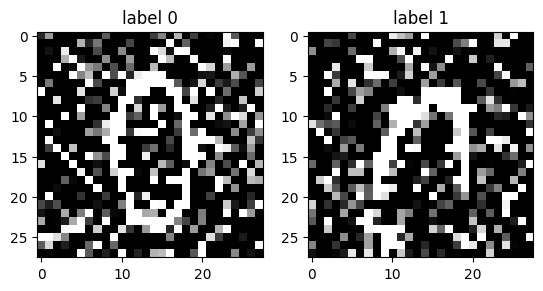

In [4]:
# load the data
df_train = pd.read_csv('kmnist_train.csv')

fig, ax = plt.subplots(1,2)
# use the matplotlib function imshow to display a handwritten 0
ax[0].imshow(df_train.iloc[200].values[0:-1].reshape((28,28)), cmap='gray')
ax[0].set_title(f'label {int(df_train.iloc[200].values[-1])}')

# use the matplotlib function imshow to display a handwritten 1
ax[1].imshow(df_train.iloc[300].values[0:-1].reshape((28,28)), cmap='gray')
ax[1].set_title(f'label {int(df_train.iloc[300].values[-1])}')

fig.show()


<div class='exercise-r'>

**2.**
    
</div>

In [5]:
# get training data
X_train = df_train.drop(columns=['output'],axis=1)
y_train = df_train[['output']]

# build a fully-connected network (FCN)
model_overfit = tf.keras.Sequential()
model_overfit.add(tf.keras.layers.Dense(100, input_dim=X_train.shape[1], activation='relu'))
model_overfit.add(tf.keras.layers.Dense(100, activation='relu'))
model_overfit.add(tf.keras.layers.Dense(100, activation='relu'))
model_overfit.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model_overfit.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

# fit the model
overfit_history = model_overfit.fit(
    x = X_train,
    y = y_train,
    epochs = 1500,
    batch_size = 128,
    validation_split = 0.3,
    verbose = 0
)


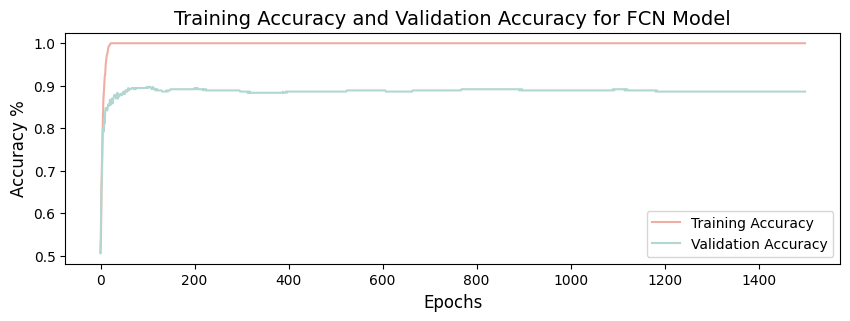

In [6]:
# plot the training accuracy and validation accuracy
fig = plt.figure(figsize = (10,3))
ax = fig.gca()
ax.plot(overfit_history.history['accuracy'], color='#EFAEA4',label = 'Training Accuracy')
ax.plot(overfit_history.history['val_accuracy'], color='#B2D7D0',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs', fontsize=AXIS_LABEL_SIZE)
ax.set_ylabel('Accuracy %', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Training Accuracy and Validation Accuracy for FCN Model', fontsize = 14)
fig.show()


**INTERPRETATION:**

Overfitting happens when the model perfectly, or almost perfectly, fits the training data, so it is not generalized enough. The accuracy on the test data will therefore be significantly lower than the accuracy on the training data.

In conclusion, we can tell that a modle overfits when the accuracy for training data is a lot higher than accuracy for test data.

<div class='exercise-r'>

**3.** 

**3.1**
    
</div>

In [7]:
# func 1: flip the image
def flip(img_values):
    '''
     :function  flip an image along x axis
     :input     image is a 785*1 array
     :output    fliped image (a 785*1 array)
    '''
    image = img_values[0:-1].reshape((28,28))
    label = img_values[-1]
    image_flip = np.zeros((28,28))

    for i in range(0, 28):
        image_flip[i] = image[i][::-1]

    return np.append(image_flip.reshape((-1,)), label)

# func 2: rotate the image by 90/180/270 degree
def rotate(img_values, degree=90):
    '''
     :function  rotate an image by given degree
     :input     image is a 785*1 array, degree should be 90/180/270
     :output    rotated image (a 785*1 array)
    '''
    image = img_values[0:-1].reshape((28,28))
    label = img_values[-1]
    image_rotate = np.zeros((28,28))

    if degree == 90:
        for i in range(0,28):
            image_rotate[i] = image[:,27-i]
    elif degree == 180:
        image_rotate = image[::-1,::-1]
    else:
        for i in range(0,28):
            image_rotate[i] = image[::-1,i]

    return np.append(image_rotate.reshape((-1,)), label)

# func 3: move the image along x-axis and y-axis
def move(img_values, _x=3, _y=3):
    '''
     :function  move an image by (_x,_y)
     :input     image is a 785*1 array, abs(_x) and abs(_y) should be in (1,5]
     :output    moved image (a 785*1 array)
    '''
    img_values = df_train.iloc[300].values
    image = img_values[0:-1].reshape((28,28))
    label = img_values[-1]
    image_moved_x = np.zeros((28,28))
    image_moved = np.zeros((28,28))

    m_x = int((_x)/(abs(_x)) * min(abs(_x),5))
    m_y = int((_y)/(abs(_y)) * min(abs(_y),5))

    for i in range(0,28):
        image_moved_x[i] = np.append(image,image,axis=0)[i-m_x]

    for j in range(0,28):
        image_moved[:,j] = np.append(image_moved_x,image_moved_x,axis=1)[:,j-m_y]

    return np.append(image_moved.reshape((-1,)), label)

# func 4: randomly cover up some part of the image (5*5)
def cover_rand(img_values):
    '''
     :function  move an image by (_x,_y)
     :input     image is a 785*1 array, abs(_x) and abs(_y) should be in (1,5]
     :output    moved image (a 785*1 array)
    '''
    img_values = df_train.iloc[300].values
    image = img_values[0:-1].reshape((28,28))
    label = img_values[-1]
    
    image_cover = image
    bx = np.random.randint(23)
    by = np.random.randint(23)
    image_cover[bx:bx+5,by:by+5] = np.ones((5,5))*image.min()

    return np.append(image_cover.reshape((-1,)), label)

# test: test filp and rotate and move function
def test_flip_rotate_move(img_values):
    images = [img_values, flip(img_values)]
    str_img = ['origin','fliped']

    fig, ax = plt.subplots(3,4)
    for i in range(0,2):
        ax[i][0].imshow(images[i][0:-1].reshape((28,28)), cmap='gray')
        ax[i][0].set_title(str_img[i])

        ax[i][1].imshow(rotate(images[i],90)[0:-1].reshape((28,28)), cmap='gray')
        ax[i][1].set_title(f'{str_img[i]} 90')

        ax[i][2].imshow(rotate(images[i],180)[0:-1].reshape((28,28)), cmap='gray')
        ax[i][2].set_title(f'{str_img[i]} 180')

        ax[i][3].imshow(rotate(images[i],270)[0:-1].reshape((28,28)), cmap='gray')
        ax[i][3].set_title(f'{str_img[i]} 270')
    
    ax[2][0].imshow(move(img_values,3,3)[0:-1].reshape((28,28)), cmap='gray')
    ax[2][0].set_title('move (3,3)')

    ax[2][1].imshow(move(img_values,-3,-3)[0:-1].reshape((28,28)), cmap='gray')
    ax[2][1].set_title('move (-3,-3)')

    ax[2][2].imshow(move(img_values,-3,3)[0:-1].reshape((28,28)), cmap='gray')
    ax[2][2].set_title('move (-3,3)')

    ax[2][3].imshow(move(img_values,3,-3)[0:-1].reshape((28,28)), cmap='gray')
    ax[2][3].set_title('move (3,-3)')

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.4)
    fig.show()

# test_flip_rotate_move(df_train.iloc[300].values)


In [8]:
#############################################################
# APPROACH 1: data augmentation
EXPAND_NUM = 300
train_expanded = []

# expand 0 image
expand_indexs_0 = np.random.choice(np.where(df_train['output']==0)[0], EXPAND_NUM//2, replace=False)
for i in expand_indexs_0:
    v = df_train.iloc[i].values
    fv = flip(v)
    rv = rotate(v,180)
    train_expanded.extend([fv, rv])         # flip, rotate
    train_expanded.extend([rotate(fv,180)]) # flip + rotate
    # train_expanded.extend([cover_rand(v)])  # cover
    train_expanded.extend([move(v,_x,_y) for _x,_y in zip([2,-2,2,-2],[2,-2,-2,2])])    # move*4
    train_expanded.extend([move(fv,_x,_y) for _x,_y in zip([2,-2,2,-2],[2,-2,-2,2])])   # flip + move*4

# expand 1 image
expand_indexs_1 = np.random.choice(np.where(df_train['output']==1)[0], EXPAND_NUM//2, replace=False)
for i in expand_indexs_1:
    v = df_train.iloc[i].values
    fv = flip(v)
    train_expanded.extend([fv])             # flip
    # train_expanded.extend([cover_rand(v)])  # cover
    train_expanded.extend([move(v,_x,_y) for _x,_y in zip([2,-2,2,-2],[2,-2,-2,2])])    # move*4
    train_expanded.extend([move(fv,_x,_y) for _x,_y in zip([2,-2,2,-2],[2,-2,-2,2])])   # flip + move*4

# get augmented training dataframe, and remember to shuffle the data
df_train_expanded = pd.DataFrame(np.array(train_expanded), columns=df_train.columns)
df_train_new = pd.concat([df_train, df_train_expanded], axis=0)
df_train_new = df_train_new.sample(frac=1.0,replace=False)

# get new training predictors and response
X_train_new = df_train_new.drop(columns=['output'], axis=1)
y_train_new = df_train_new[['output']]

# normalize training data
scaler = StandardScaler()
std_array = scaler.fit_transform(X_train_new)      # this method returns an array
X_train_new = pd.DataFrame(std_array, columns=X_train_new.columns)


#############################################################
# APPROACH 2: number of epochs (max 2000), batch size, optimizer
EPOCHS_NEW      = 1500
BATCH_SIZE_NEW  = 128
optimizer_new   = tf.keras.optimizers.Adamax(
    learning_rate = 0.001,  # learning rate
    beta_1 = 0.9,       # related to momentum
    beta_2 = 0.999,     # related to RMSProp
)


#############################################################
# APPROACH 3: regularization
my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Dense(100, input_dim = X_train.shape[1], kernel_regularizer=tf.keras.regularizers.l1(0.01)))
my_model.add(tf.keras.layers.BatchNormalization())
my_model.add(tf.keras.layers.Activation(activation='relu'))
my_model.add(tf.keras.layers.Dropout(0.5))
my_model.add(tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.01)))
my_model.add(tf.keras.layers.BatchNormalization())
my_model.add(tf.keras.layers.Activation(activation='relu'))
my_model.add(tf.keras.layers.Dropout(0.5))
my_model.add(tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.02)))
my_model.add(tf.keras.layers.BatchNormalization())
my_model.add(tf.keras.layers.Activation(activation='relu'))
my_model.add(tf.keras.layers.Dropout(0.5))
my_model.add(tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.04), activation='sigmoid'))

# compile the model
my_model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizer_new,
    metrics = ['accuracy']
)

# earlystopping callback
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 50,
    restore_best_weights = True
)

# display model summary
print(my_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                      

In [9]:
# fit the model
new_history = my_model.fit(
    x = X_train_new,
    y = y_train_new,
    epochs = EPOCHS_NEW,
    batch_size = BATCH_SIZE_NEW,
    validation_split = 0.3,
    callbacks=[earlystop],
    verbose = 0
)

# print out training and validation accuracy and loss
print('New model training   loss:', new_history.history['loss'][-1])
print('New model validation loss:',new_history.history['val_loss'][-1])
print('New model training   accuracy:',new_history.history['accuracy'][-1])
print('New model validation accuracy:',new_history.history['val_accuracy'][-1])


New model training   loss: 0.31420230865478516
New model validation loss: 0.32150521874427795
New model training   accuracy: 0.9853741526603699
New model validation accuracy: 0.9849206209182739


<div class='exercise-r'>

**3.2**
    
</div>

In [10]:
# print the difference between the training and validation losses
print('The difference between training and validation losses:', new_history.history['loss'][-1]-new_history.history['val_loss'][-1])

# print the difference between the training and validation accuracies
print('The difference between training and validation accuracies:', new_history.history['accuracy'][-1]-new_history.history['val_accuracy'][-1])


The difference between training and validation losses: -0.007302910089492798
The difference between training and validation accuracies: 0.00045353174209594727


<div class='exercise-r'>

**3.3**
    
</div>

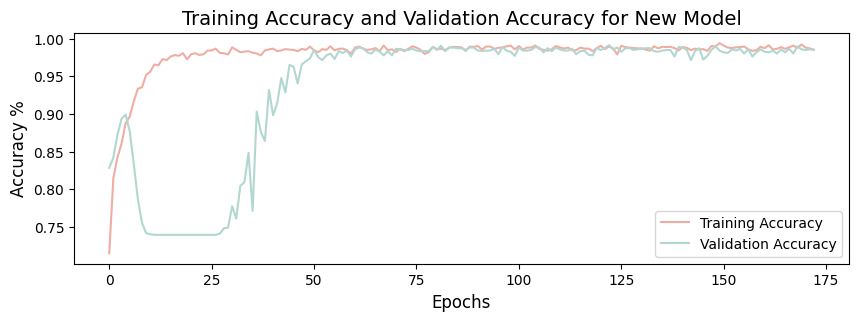

In [11]:
# plot the training accuracy and validation accuracy
fig = plt.figure(figsize = (10,3))
ax = fig.gca()
ax.plot(new_history.history['accuracy'], color='#EFAEA4',label = 'Training Accuracy')
ax.plot(new_history.history['val_accuracy'], color='#B2D7D0',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs', fontsize=AXIS_LABEL_SIZE)
ax.set_ylabel('Accuracy %', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Training Accuracy and Validation Accuracy for New Model', fontsize = 14)
fig.show()


<div class='exercise-r'>

**3.4**
    
</div>

In [12]:
# get test data
df_test  = pd.read_csv('kmnist_test.csv')
X_test = df_test.drop(columns=['output'],axis=1)
y_test = df_test[['output']]

# normalize test data using the same scaler
std_array = scaler.transform(X_test)      # this method returns an array
X_test = pd.DataFrame(std_array, columns=X_test.columns)

# evaluate model on the test dataset
loss_test, aucc_test = my_model.evaluate(X_test, y_test, verbose=0)

# print test accuracy
print(f'New model test accuracy: {aucc_test:.5f}')


New model test accuracy: 0.92650
